In [83]:
pip install omadb  pandas seaborn numpy scipy pyham SPARQLWrapper networkx

Note: you may need to restart the kernel to use updated packages.


In [84]:
#Obtain a list of genes from uniprot.

import json
import requests

def unirequest_tab(GOterm):
    url = 'http://rest.uniprot.org/uniprotkb/stream?'
    params = [
    'query=(organism_id:9606)%20AND%20(go:{})'.format(GOterm),
    'fields=id,gene_names,protein_name,reviewed,protein_name,organism_name,xref_bgee',
    'format=tsv',
    ]
    params = ''.join([ p+'&' for p in params ])[:-1]
    print(url+params)
    data = requests.get(url+params).text
    
    return data
#here we pull in our proteins of interest for each biological process
terms = ['0030509' ,'0031929']
pathways = ['BMP', 'TOR']
datasets = { t:unirequest_tab(t) for t in terms}



http://rest.uniprot.org/uniprotkb/stream?query=(organism_id:9606)%20AND%20(go:0030509)&fields=id,gene_names,protein_name,reviewed,protein_name,organism_name,xref_bgee&format=tsv
http://rest.uniprot.org/uniprotkb/stream?query=(organism_id:9606)%20AND%20(go:0031929)&fields=id,gene_names,protein_name,reviewed,protein_name,organism_name,xref_bgee&format=tsv


In [85]:
import pandas as pd
import numpy as np
from io import StringIO

#Load queries into some dataframes

queries =[]
for i,term in enumerate(datasets):
    df = pd.read_table(StringIO(datasets[term]))
    print(df.head())
    df['pathway'] = pathways[i]
    df['protein_name'] = df['Protein names'].map( lambda x : x.split(',')[0])

    df = df[df.Reviewed != 'unreviewed']
    df['short_name'] = df['Gene Names'].map( lambda x : x.split(' ')[0])
    #let's subsample to a few entries for the sake of brevity 
    df = df.sample(n = 20)
    print(df.head())
    queries.append(df)
    

#Total starting dataset
queries = pd.concat(queries)
#in this line we iterate through the dataframe to generate a dictionary of names we will use to identify our proteins at each step of our analysis.
names= { query['Entry Name']:query['short_name'] + ' '+query.pathway for index,query in queries[['Entry Name','short_name','pathway']].iterrows() if query['short_name'] is not np.nan }

         Entry Name       Gene Names  \
0  A0A024R274_HUMAN  SMAD4 hCG_23686   
1  A0A024R8E2_HUMAN   ABL1 hCG_28416   
2  A0A0S2Z310_HUMAN           ACVRL1   
3  A0A140VJU3_HUMAN              NaN   
4  A0A384N611_HUMAN              NaN   

                                       Protein names    Reviewed  \
0  Mothers against decapentaplegic homolog, MAD h...  unreviewed   
1               Tyrosine-protein kinase, EC 2.7.10.2  unreviewed   
2  Serine/threonine-protein kinase receptor, EC 2...  unreviewed   
3                   Testicular tissue protein Li 170  unreviewed   
4                                        Protein Wnt  unreviewed   

                                     Protein names.1              Organism  \
0  Mothers against decapentaplegic homolog, MAD h...  Homo sapiens (Human)   
1               Tyrosine-protein kinase, EC 2.7.10.2  Homo sapiens (Human)   
2  Serine/threonine-protein kinase receptor, EC 2...  Homo sapiens (Human)   
3                   Testicular tissue 

In [86]:
queries

,Entry Name,Gene Names,Protein names,Reviewed,Protein names.1,Organism,Bgee,pathway,protein_name,short_name
40,BMR1A_HUMAN,BMPR1A ACVRLK3 ALK3,"Bone morphogenetic protein receptor type-1A, B...",reviewed,"Bone morphogenetic protein receptor type-1A, B...",Homo sapiens (Human),ENSG00000107779;,BMP,Bone morphogenetic protein receptor type-1A,BMPR1A
52,ACVR1_HUMAN,ACVR1 ACVRLK2,"Activin receptor type-1, EC 2.7.11.30 (Activin...",reviewed,"Activin receptor type-1, EC 2.7.11.30 (Activin...",Homo sapiens (Human),ENSG00000115170;,BMP,Activin receptor type-1,ACVR1
95,LEF1_HUMAN,LEF1,"Lymphoid enhancer-binding factor 1, LEF-1 (T c...",reviewed,"Lymphoid enhancer-binding factor 1, LEF-1 (T c...",Homo sapiens (Human),ENSG00000138795;,BMP,Lymphoid enhancer-binding factor 1,LEF1
69,SOSD1_HUMAN,SOSTDC1 USAG1 CDA019,Sclerostin domain-containing protein 1 (Ectode...,reviewed,Sclerostin domain-containing protein 1 (Ectode...,Homo sapiens (Human),ENSG00000171243;,BMP,Sclerostin domain-containing protein 1 (Ectode...,SOSTDC1
35,AVR2A_HUMAN,ACVR2A ACVR2,"Activin receptor type-2A, EC 2.7.11.30 (Activi...",reviewed,"Activin receptor type-2A, EC 2.7.11.30 (Activi...",Homo sapiens (Human),ENSG00000121989;,BMP,Activin receptor type-2A,ACVR2A
38,MSX1_HUMAN,MSX1 HOX7,Homeobox protein MSX-1 (Homeobox protein Hox-7...,reviewed,Homeobox protein MSX-1 (Homeobox protein Hox-7...,Homo sapiens (Human),ENSG00000163132;,BMP,Homeobox protein MSX-1 (Homeobox protein Hox-7...,MSX1
90,CHRD_HUMAN,CHRD UNQ217/PRO243,Chordin,reviewed,Chordin,Homo sapiens (Human),ENSG00000090539;,BMP,Chordin,CHRD
41,ACVL1_HUMAN,ACVRL1 ACVRLK1 ALK1,"Serine/threonine-protein kinase receptor R3, S...",reviewed,"Serine/threonine-protein kinase receptor R3, S...",Homo sapiens (Human),ENSG00000139567;,BMP,Serine/threonine-protein kinase receptor R3,ACVRL1
57,RUNX2_HUMAN,RUNX2 AML3 CBFA1 OSF2 PEBP2A,Runt-related transcription factor 2 (Acute mye...,reviewed,Runt-related transcription factor 2 (Acute mye...,Homo sapiens (Human),ENSG00000124813;,BMP,Runt-related transcription factor 2 (Acute mye...,RUNX2
86,GDF15_HUMAN,GDF15 MIC1 PDF PLAB PTGFB,"Growth/differentiation factor 15, GDF-15 (Macr...",reviewed,"Growth/differentiation factor 15, GDF-15 (Macr...",Homo sapiens (Human),ENSG00000130513;,BMP,Growth/differentiation factor 15,GDF15


In [87]:
from omadb import Client
c = Client()
omadata = {}
#retrieve oma entries for all query genes
for query in list(queries['Entry Name']) :
    try:
        omadata[query] = c.entries.__getitem__(query) 
    except:
        print('err ' +query)

#Take all queries from human and
#get orthologs in all of the species they're found in
orthologs = {}
for query in omadata:
    orthologs[query] = c.entries.orthologs(omadata[query]['omaid'])

#Create profiles from orthology data, with species codes as columns
#obtain all species codes for query genes
profiles = {}
for query in orthologs:
    profiles[query] = {}
    profiles[query]['short_name'] = names[query]
    for ortho in orthologs[query]:
        spec = ortho['omaid'][0:5]
        if spec not in profiles[query]:
            profiles[query][spec] = 1
        else:
            profiles[query][spec]+=1

#The columns of the matrix are the union of all the species represented across all orthologs
columns = set([ spec  for query in profiles for spec in profiles[query] ])
#Add in 0s where the orthologs are absent
for query in profiles:
    profiles[query].update( { spec : 0 for spec in columns if spec not in profiles[query] } )

#Create a dataframe with this dictionary

orthosdf = pd.DataFrame.from_dict( profiles , orient = 'index')
orthosdf.index = orthosdf.short_name
orthosdf = orthosdf.drop('short_name', axis = 1)


In [88]:
orthosdf.head()

,CALMI,LEPOC,ANGAN,ANATE,SERDU,ECHNA,CYNSE,SCOMX,GASAC,SPAAU,...,FOLCA,BRADI,PUCGT,LEIMA,ASPNG,DROVI,GRIFR,MICPC,LOTJA,COPC7
short_name,,,,,,,,,,,,,,,,,,,,,
BMPR1A BMP,1,1,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ACVR1 BMP,1,1,2,1,2,1,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
LEF1 BMP,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
SOSTDC1 BMP,1,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
ACVR2A BMP,1,1,2,1,1,1,1,1,1,1,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
#Use seaborn to visualize the clustering of functional modules

import seaborn as sns
from matplotlib import pyplot as plt

#Metrics used to compare the vectors to establish a distance kernel
metrics = [ 'euclidean', 'hamming', 'jaccard' ]

#Hierarchical clustering methods
methods = [ 'average' , 'weighted' , 'centroid']

#Visualize the clustered profile matrix
sns.clustermap( orthosdf.T , metric= metrics[2] , method=methods[1] , col_cluster=True, row_cluster= False, yticklabels = orthosdf.columns , figsize = (10, 100))


/home/cactuskid/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [ ]:
#here we directly establish the distance matrix between all profiles
from scipy.spatial.distance import cdist

#let's generate a distance kernel with a distance metric of our choice
distmat = cdist(orthosdf.to_numpy(), orthosdf.to_numpy() , metric = metrics[2])
sns.clustermap( 1-distmat , metric= metrics[0] , method=methods[1] , col_cluster=True, row_cluster= True, yticklabels = orthosdf.index , xticklabels = orthosdf.index , figsize = (20, 20))


In [ ]:
#let's use independent analysis to comfirm 
#we need the BGee cross reference for our genes and some network data from string

qlist = { query['Entry Name']:query['Bgee'].replace(';','') for index,query in queries[['Entry Name','Bgee']].iterrows() if query['Bgee'] is not np.nan }
qlists = {'HUMAN': qlist }

# now using some cross references to other organisms
xrefs = {}
#we're going to grab the ensemble IDs for the orthologues from a few species also present in the Bgee dataset
#Bgee species are listed here https://bgee.org
#species information for OMA is available at https://omabrowser.org/All/oma-species.txt
#Ive selected some interesting species that are in both
species = [ 'DROME','CAEEL' , 'DANRE' , 'MOUSE' , 'PIGXX']
#... my cat would never forgive me if I didn't include them in the analysis
species +=['FELCA']

#retrieve the uniprot xrefs for each of the sequences
allnames = {}
taxmap = {'HUMAN':9606}

for q in orthologs:
    for o in orthologs[q]:
        for spec in species:
            if spec not in xrefs:
                xrefs[spec] = {}
            
            if  o['omaid'][0:5] == spec:
                if spec not in taxmap:
                    taxmap[spec] = o['species']['taxon_id']
                xrefs[spec][o['omaid'] ] = c.entries.xrefs(o['omaid'])
                if 'UniProtKB/TrEMBL' in xrefs[spec][o['omaid'] ]:
                    names[ xrefs[spec][o['omaid']]['UniProtKB/TrEMBL'][0]] = names[q]
allnames.update(names)


for spec in species:
    #map everything to Bgee/ensembl gene IDs
    qlist = {}
    tryagain = []
    for entry in xrefs[spec]:
        if 'Bgee' in xrefs[spec][entry]  and 'UniProtKB/TrEMBL' in xrefs[spec][entry]:
            try:
                qlist.update({xrefs[spec][entry]['UniProtKB/TrEMBL'][0] : xrefs[spec][entry]['Bgee'][0].split('.')[0] })
            except IndexError:
                pass
        elif 'UniProtKB/TrEMBL' in xrefs[spec][entry]:
            tryagain.append(xrefs[spec][entry]['UniProtKB/TrEMBL'][0])
    print('qlist',qlist)
    print(tryagain)
    qlists[spec] = qlist
    

In [ ]:
select = orthosdf.index.map( lambda x : 'TOR' in x )
tor_orthodf = orthosdf[select]
tor_distmat = cdist(tor_orthodf.to_numpy(), tor_orthodf.to_numpy() , metric = metrics[2])
Interactor_Graph = nx.from_numpy_matrix(tor_distmat)
print(Interactor_Graph)

k = 10
filtergraph = nx.Graph()
for n1 in Interactor_Graph.nodes:
    edges = [ Interactor_Graph.edges[n1][n2] for n2 in Interactor_Graph.neighbors(n1) ]
    weights = [ Interactor_Graph.edges[n1][n2]['weight'] for n2 in Interactor_Graph.neighbors(n1)  ]
    sort = np.argsort(weights)
    edges = np.array(edges)[sort]
    edges = list(edges[0:k])
    filtergraph.add_edges_from(edges)
print(filtergraph)
    

In [ ]:
#Retrieving tissue specific expression for each of our genes using
#a sparql query for using lists of ensemble IDs on BGEE
from SPARQLWrapper import SPARQLWrapper , CSV
from io import StringIO

endpt = "https://bgee.org/sparql/"
sparql = SPARQLWrapper(endpt)

#here's the template sparql query we're going to be using
#we can add our gene IDs for each species

query = '''

PREFIX orth: <http://purl.org/net/orth#>
PREFIX genex: <http://purl.org/genex#>
PREFIX lscr: <http://purl.org/lscr#>
PREFIX gene: <http://purl.org/net/orth#Gene>
PREFIX obo: <http://purl.obolibrary.org/obo/>
SELECT DISTINCT ?anat ?anatName ?geneEns{{
    
    values  ?geneEns {{   {0}   }}
    ?gene genex:isExpressedIn ?anat .
    ?gene lscr:xrefEnsemblGene ?geneEns.
	?gene rdfs:label ?geneName .
	?anat rdfs:label ?anatName .
}}
'''

dfs = []
for species in qlists:
    print(qlists[species])
    #for each species in our queries
    #make a list of gene IDs
    
    pre = '<http://rdf.ebi.ac.uk/resource/ensembl/'
    suf = '>'
    ensemblelist = ''.join( [ pre + qlists[species][uniID]  + suf + ' ' for uniID in qlists[species] ] )
    #get the Bgee data
    print(ensemblelist)
    sparql.setQuery(query.format(ensemblelist))
    sparql.setReturnFormat(CSV)
    results = sparql.query().convert()
    #and make a dataframe for our returned results
    sub = pd.read_csv(StringIO(results.decode()) )
    #add which species the data came from to our dataframe columns
    sub['species'] = species
    sub['geneEns'] = sub['geneEns'].map(lambda x : x.split('/')[-1])
    
    #add the uniprot cannonical IDs into our dataframe as well
    sub['canonicalid'] = sub['geneEns'].map(dict(zip( qlists[species].values(), qlists[species].keys() )))
    #use uniprot IDs to map back to our original human gene names 
    sub['names'] =  sub['canonicalid'].map(names)
    dfs.append(sub)


#put everything into one big dataframe
expressionDF = pd.concat(dfs)


In [ ]:
#now for the results of our efforts!
from scipy.stats import pearsonr , spearmanr


expression_mats = {}
expression_rowmappers = {}

for spec in expressionDF.species.unique():
    selected = set()
    #look at the clustering of the expression data for each species
    print(spec)
    sub = expressionDF[expressionDF.species == spec]
    #we can create another dataframe which shows the genes expressed in each tissue
    print(sub.head())
    #each row is a gene
    #each column is a tissue
    #we only consider tissues where at least one of the genes is expressed
    rows = list(sub.names.unique())
    columns = list(sub.anatName.unique())
    expr_mat = {r :{ c : 0 for c in columns  } for r in rows }
    #lets set all of the places where each gene is expressed to 1
    for i,r in sub.iterrows():
        selected.add(r.names)
        expr_mat[r.names][r.anatName] = 1
    #and transform everything into a dataframe
    expr_mat = pd.DataFrame.from_dict( expr_mat , orient='index' )
    #generate a clustered heatmap figure
    #to show similarity in expression patterns across tissues
    g = sns.clustermap( expr_mat , metric= metrics[0] , method=methods[2] , col_cluster=True, row_cluster= True , cmap = sns.color_palette("mako", 2))
    g.fig.suptitle(spec)
    g.savefig( spec+'expcluster.svg')
    plt.show()
    
    #comparing the phylogenetic profile distmat
    sub_orthodf = orthosdf.loc[selected]
    distmat_ortho = cdist(sub_orthodf.to_numpy(), sub_orthodf.to_numpy() , metric = metrics[2])
    g = sns.clustermap( 1-distmat_ortho , metric= metrics[0] , method=methods[1] , rasterized=True, col_cluster=True, row_cluster= True, yticklabels = selected , xticklabels = selected , figsize = (15, 15)  )
    g.fig.suptitle( 'coevolution distmat' + spec) 
    plt.show()
    
    #with the expression profile distmat
    distmat_expr = cdist(expr_mat.to_numpy(), expr_mat.to_numpy() , metric = metrics[0])
    g = sns.clustermap( 1-distmat_expr , metric= metrics[0] , method=methods[1] , col_cluster=True,rasterized=True,  row_cluster= True, yticklabels = selected, xticklabels =selected , figsize = (15, 15) )
    g.fig.suptitle( 'expression distmat' + spec ) 
    plt.show()
    
    expression_mats[spec] = distmat_expr
    expression_rowmappers[spec] = selected
    
    #verify if expression and phylogenetic profile distances are correlated.
    print( ' do our matrices match from one approach to the other? ')
    plt.title( 'Expression vs. Ortho Profile distances')
    plt.xlabel( 'Profile Jaccard distance ')
    plt.ylabel( 'Expression Euclidean distance ')
    plt.scatter(1-distmat_ortho.ravel() , distmat_expr.ravel() , alpha= .25)
    plt.show()
    print( 'Pearson:'+ str( pearsonr( 1-distmat_ortho.ravel() , 1-distmat_expr.ravel() )  ) ) 
    

In [ ]:
#pretty good matches in the cases where there is good resolution in the tissues
#It looks like there is coevolution and coexpression signal within each network
#now we can compare the networks generated with each approach to string.
#mtor and bmp are well studied pathways so they should have experimental
#and literature evidence in their String data

In [ ]:
#adapted from the string api reference https://string-db.org/help/api/
import requests ## python -m pip install requests
from time import sleep
from io import StringIO

string_api_url = "https://version-11-5.string-db.org/api"
def map2string(my_genes, species):
    output_format = "tsv-no-header"
    method = "get_string_ids"

    params = {
        "identifiers" : "\r".join(my_genes), # your protein list
        "species" : species , # species NCBI identifier 
        "limit" : 1, # only one (best) identifier per input protein
        "echo_query" : 1, # see your input identifiers in the output
        "caller_identity" :  "OMA profiling ipython notebook"  # your app name
    }
    request_url = "/".join([string_api_url, output_format, method])
    results = requests.post(request_url, data=params)
    mapper = {}
    for line in results.text.strip().split("\n"):
        l = line.split("\t")
        input_identifier, string_identifier = l[0], l[2]
        #print("Input:", input_identifier, "STRING:", string_identifier, sep="\t")
        mapper[string_identifier]= input_identifier
    return mapper

def get_string_net(my_genes , species, output_format = 'tsv'):
    sleep(1)
    method = "network"    
    request_url = "/".join([string_api_url, output_format, method])
    params = {
        "identifiers" : "%0d".join(my_genes), # your protein
        "species" : species, # species NCBI identifier 

        "caller_identity" : "OMA profiling ipython notebook" # your app name
    }
    response = requests.post(request_url, data=params).text
    return pd.read_table(StringIO(response))


In [ ]:
import networkx as nx
#get interaction net from string so we can compare with our profile based net
string_graphs = {}
for spec in qlists:
    print(spec, qlists[spec])
    #get string IDs for each protein
    mapper = map2string(qlists[spec], taxmap[spec] )
    rowmapper = {ID:i for i,ID in enumerate(mapper)}
    #make the string net using experimental evidence
    netdf = get_string_net(qlists[spec], taxmap[spec])
    netdf['x'] = netdf.stringId_A.map(rowmapper)
    netdf['y'] = netdf.stringId_B.map(rowmapper)
    netdf['Uniprot_A'] = netdf.stringId_A.map(mapper)
    netdf['Uniprot_B'] = netdf.stringId_B.map(mapper)
    #lets grab a network for each of our species of interest based on experimental data
    #we can remove the phylogenetic co-occurence channel from the evidence for a more independent verification
    #we can add the other evidence channels
    netdf['graphscore'] = netdf.ascore + netdf.escore + netdf.dscore
    #transform the string net to networkx
    G = nx.Graph()
    [ G.add_edge( row.Uniprot_A , row.Uniprot_B  , weight=row.graphscore ) for idx,row in netdf.iterrows() ]
    print(G)
    weights = np.asarray([e[2]['weight'] for e in G.edges(data = True)])
    weights/=3
    #max weight is 3 but we're scaling things from 0 to 1 to compare with our phylogenetic profiles
    pos = nx.spring_layout( G , weight='weight')
    
    nx.draw(G, pos=pos, edge_color='grey', width= 10*weights , node_size= 100 ,alpha = .25 ) 
    labels=nx.draw_networkx_labels(G , pos = pos , font_size= 10 )
    plt.show()
    string_graphs[spec] = G

In [ ]:
#now lets compare the overlap between the graphs
#each method will get its own color. 
#hopefully we see some agreement between all 3
#the phylogenetic profile wont change between species
#the other 2 will change


colors = ['r','g','b']


distmat_ortho = cdist(orthosdf.to_numpy(), orthosdf.to_numpy() , metric = metrics[2])
pandas_adj = pd.DataFrame(distmat_ortho)
pandas_adj.index = orthosdf.index
pandas_adj.columns = orthosdf.index
ortho_graph = nx.from_pandas_adjacency(pandas_adj)
for spec in qlists:
    G=nx.MultiGraph()
    #add phylo profiling graph
    G.add_edges_from(ortho_graph.edges)
    #add string graph
    G.add_edges_from(string_graphs[spec].edges)
    #add expression graph  
    pandas_adj = pd.DataFrame(expression_mats[spec])
    pandas_adj.index = expression_rowmappers[spec]
    pandas_adj.colums = expression_rowmappers[spec]
    expression_graph = nx.from_pandas_adjacency(pandas_ajd)
    G.add_edges_from(expression_graph.edges)
    #plot the whole mess
    nx.draw_networkx_nodes(G, pos, node_color = 'y', node_size = 100, alpha = 1)
    ax = plt.gca()
    for e in G.edges:
        ax.annotate("",
                    xy=pos[e[0]], xycoords='data',
                    xytext=pos[e[1]], textcoords='data',
                    arrowprops=dict(arrowstyle="-", color=colors[e[2]],
                                    shrinkA=5, shrinkB=5, width = 10*e[2]['weight'],
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                    ),
                                    ),
                    )
    plt.axis('off')
    plt.show()

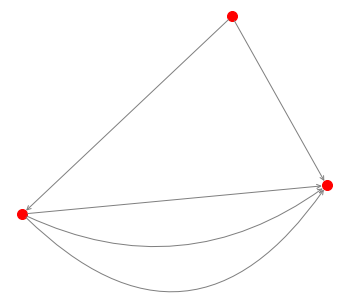

In [71]:
G=nx.MultiGraph ([(1,2),(1,2),(1,2),(3,1),(3,2)])
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()